In [1]:
setwd('/import/DB/minidir//a.fel/BJTC-204')

In [2]:
library(CellChat)
library(patchwork)

Loading required package: dplyr


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Loading required package: igraph


Attaching package: 'igraph'


The following objects are masked from 'package:dplyr':

    as_data_frame, groups, union


The following objects are masked from 'package:stats':

    decompose, spectrum


The following object is masked from 'package:base':

    union


Loading required package: ggplot2

Warning message:
"package 'patchwork' was built under R version 4.2.3"


In [3]:
cellchat.NL <- readRDS('./wt.cellchat.removedc.rds')
cellchat.LS <- readRDS('./ko.cellchat.removedc.rds')

In [4]:
cellchat.NL <- computeCommunProbPathway(cellchat.NL)
cellchat.NL <- netAnalysis_computeCentrality(cellchat.NL, slot.name = "netP")
cellchat.LS <- computeCommunProbPathway(cellchat.LS)
cellchat.LS <- netAnalysis_computeCentrality(cellchat.LS, slot.name = "netP")

In [5]:
cellchat.NL <- aggregateNet(cellchat.NL)
cellchat.LS <- aggregateNet(cellchat.LS)

In [6]:
object.list <- list(Con = cellchat.NL, MDD = cellchat.LS)
cellchat <- mergeCellChat(object.list, add.names = names(object.list))

Merge the following slots: 'data.signaling','images','net', 'netP','meta', 'idents', 'var.features' , 'DB', and 'LR'.



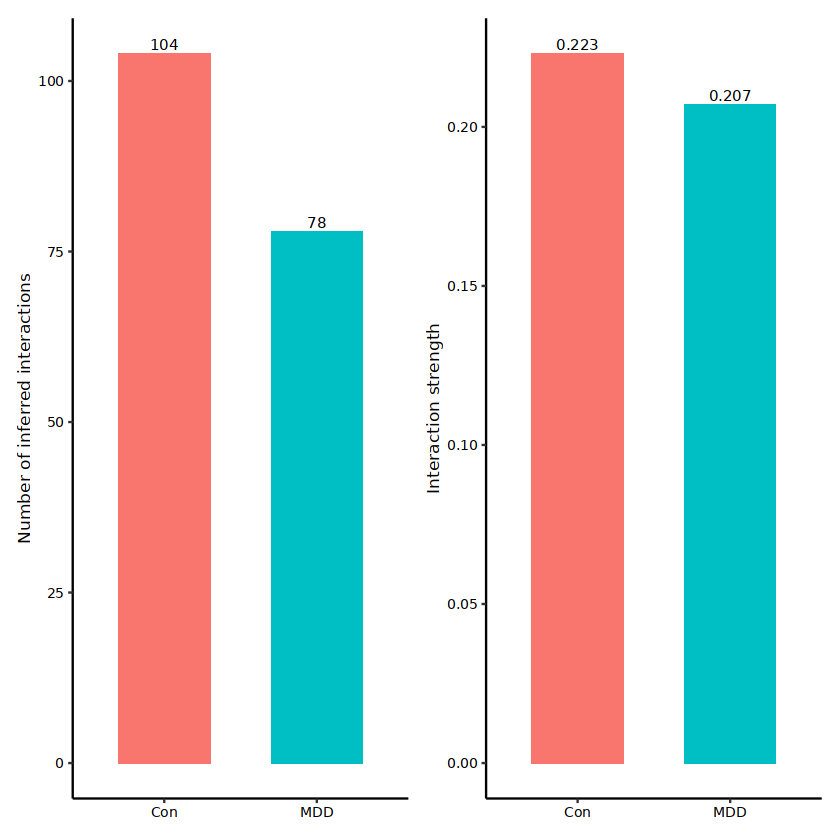

In [7]:
gg1 <- compareInteractions(cellchat, show.legend = F, group = c(1,2))
gg2 <- compareInteractions(cellchat, show.legend = F, group = c(1,2), measure = "weight")
gg1 + gg2

In [9]:
ggsave(file = './figure2/cellchat/sc.mye.cellchat1.pdf',height = 4,width = 6)

In [11]:
pdf('./figure2/cellchat/sc.mye.cellchat2.pdf',height = 5,width = 10)
par(mfrow = c(1,2), xpd=TRUE)
p = netVisual_diffInteraction(cellchat, weight.scale = T)
p1 = netVisual_diffInteraction(cellchat, weight.scale = T, measure = "weight")
dev.off()

png 
  2

Do heatmap based on a merged object 




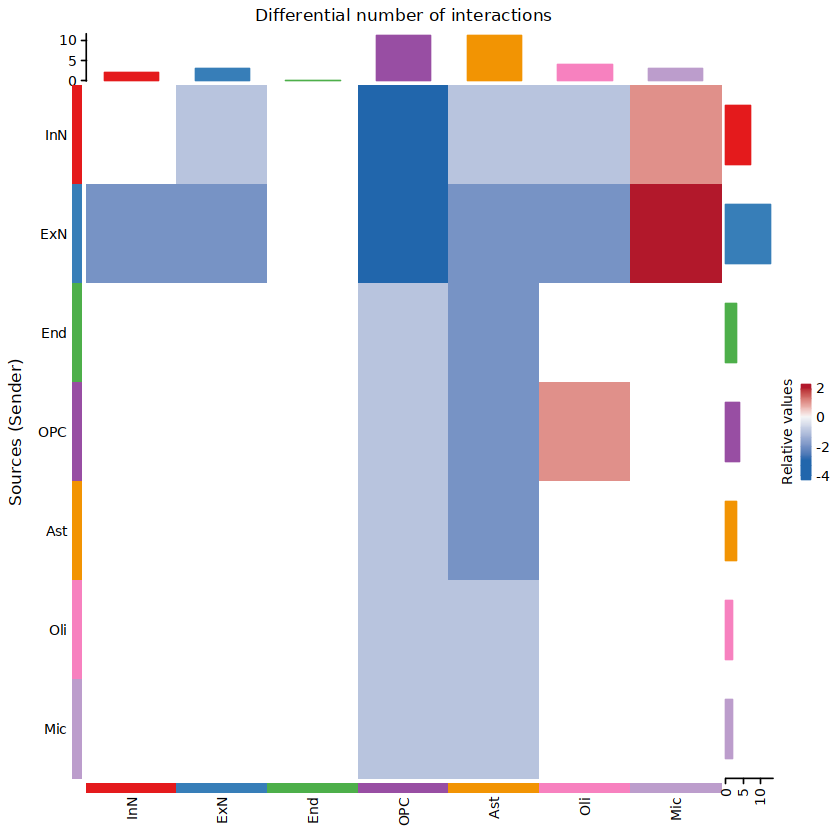

In [13]:
gg1 <- netVisual_heatmap(cellchat)
#> Do heatmap based on a merged object
#> Do heatmap based on a merged object
gg1 

Do heatmap based on a merged object 




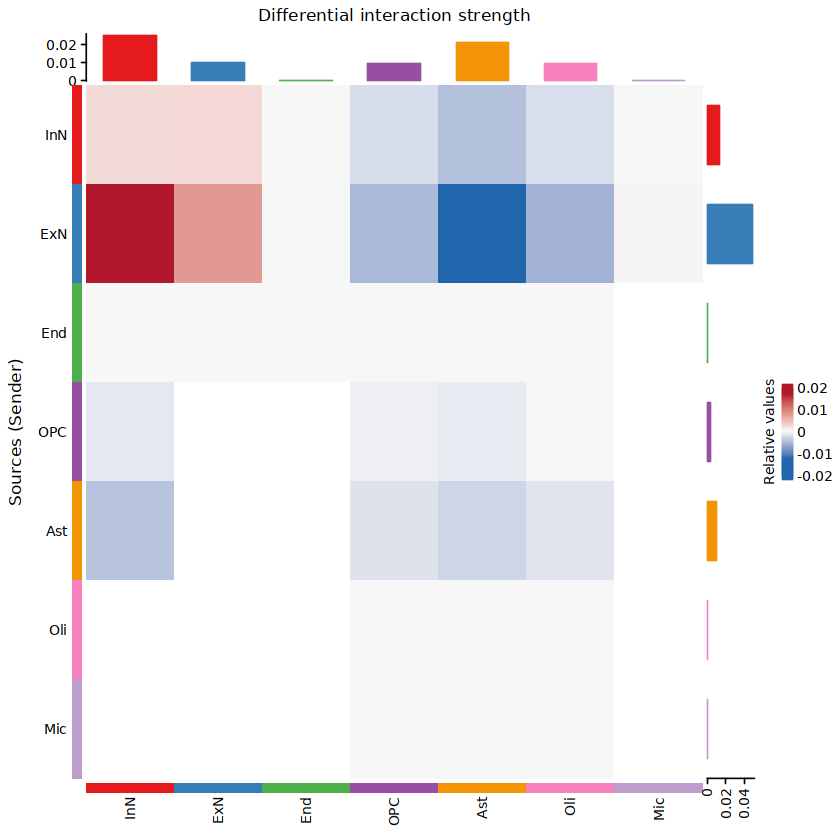

In [14]:
gg2 <- netVisual_heatmap(cellchat, measure = "weight")
gg2

In [18]:
pdf('./figure2/cellchat/sc.mye.cellchat3.pdf',height = 5,width = 5)
print(gg1 )
dev.off()
pdf('./figure2/cellchat/sc.mye.cellchat4.pdf',height = 5,width = 5)
print(gg2 )
dev.off()

png 
  2

png 
  2

In [19]:
options(repr.plot.width = 9,repr.plot.height = 6)

Signaling role analysis on the aggregated cell-cell communication network from all signaling pathways

Signaling role analysis on the aggregated cell-cell communication network from all signaling pathways



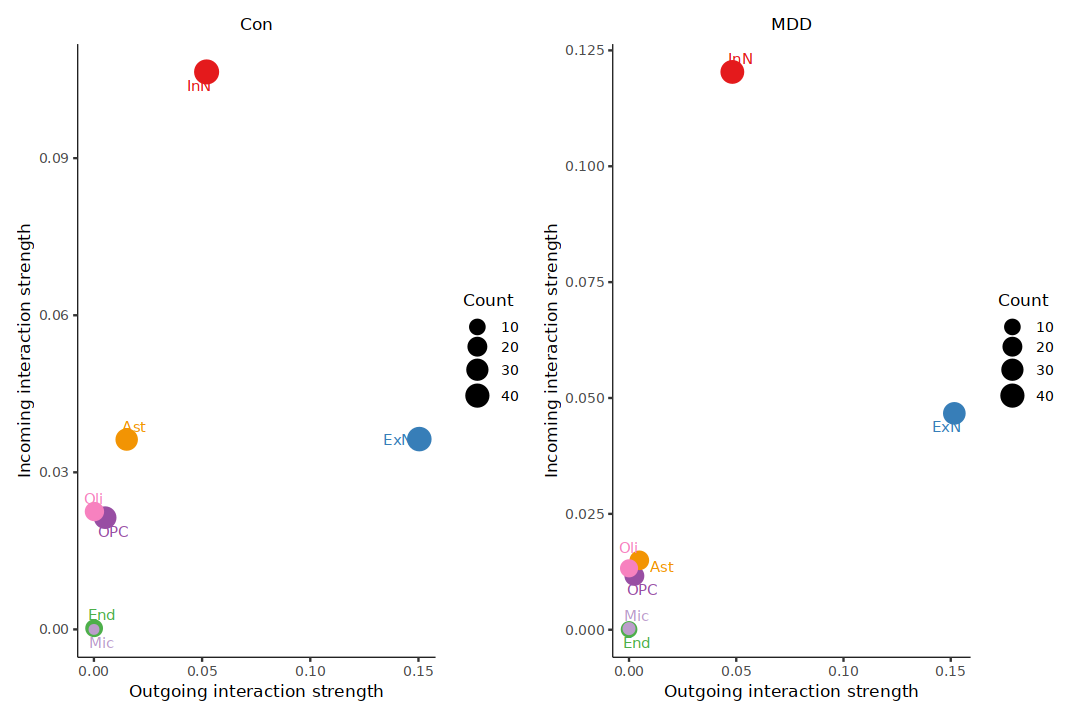

In [20]:
num.link <- sapply(object.list, function(x) {rowSums(x@net$count) + colSums(x@net$count)-diag(x@net$count)})

weight.MinMax <- c(min(num.link), max(num.link)) 
gg <- list()
for (i in 1:length(object.list)) {
  gg[[i]] <- netAnalysis_signalingRole_scatter(object.list[[i]], title = names(object.list)[i], weight.MinMax = weight.MinMax)
}
patchwork::wrap_plots(plots = gg)

In [21]:
ggsave(file = './figure2/cellchat/sc.mye.cellchat5.pdf',height = 5,width = 9)

In [25]:
gg1 <- rankNet(cellchat, mode = "comparison", stacked = T, do.stat = TRUE)
gg2 <- rankNet(cellchat, mode = "comparison", stacked = F, do.stat = TRUE)
pdf('./figure2/cellchat/sc.mye.cellchat6.pdf',height = 5,width = 8)
gg1 + gg2
dev.off()

png 
  2

In [20]:
#pathway.union <- union(object.list[[i]]@netP$pathways, object.list[[i+1]]@netP$pathways)

In [26]:
pathway.union = union(object.list[[1]]@netP$pathways,object.list[[2]]@netP$pathways)

In [36]:
par(mfrow = c(1,1), xpd=TRUE)

In [37]:
ht1 = netAnalysis_signalingRole_heatmap(object.list[[1]], pattern = "all", signaling = pathway.union, title = names(object.list)[1], width = 5, height = 6, color.heatmap = "OrRd")

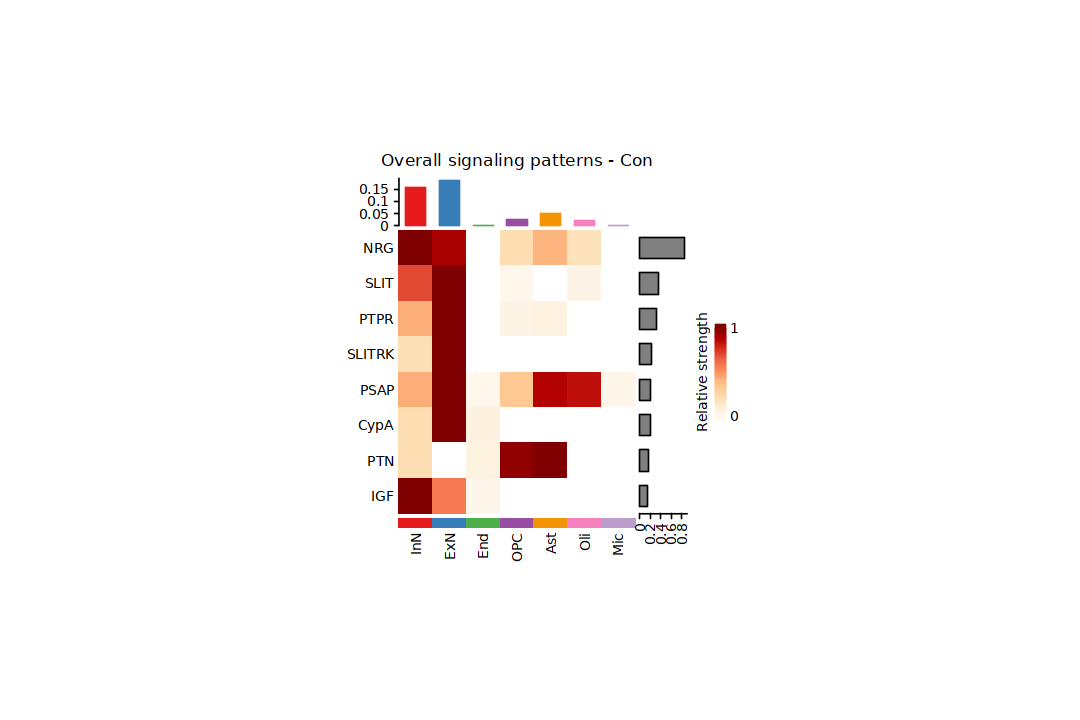

In [38]:
ht1

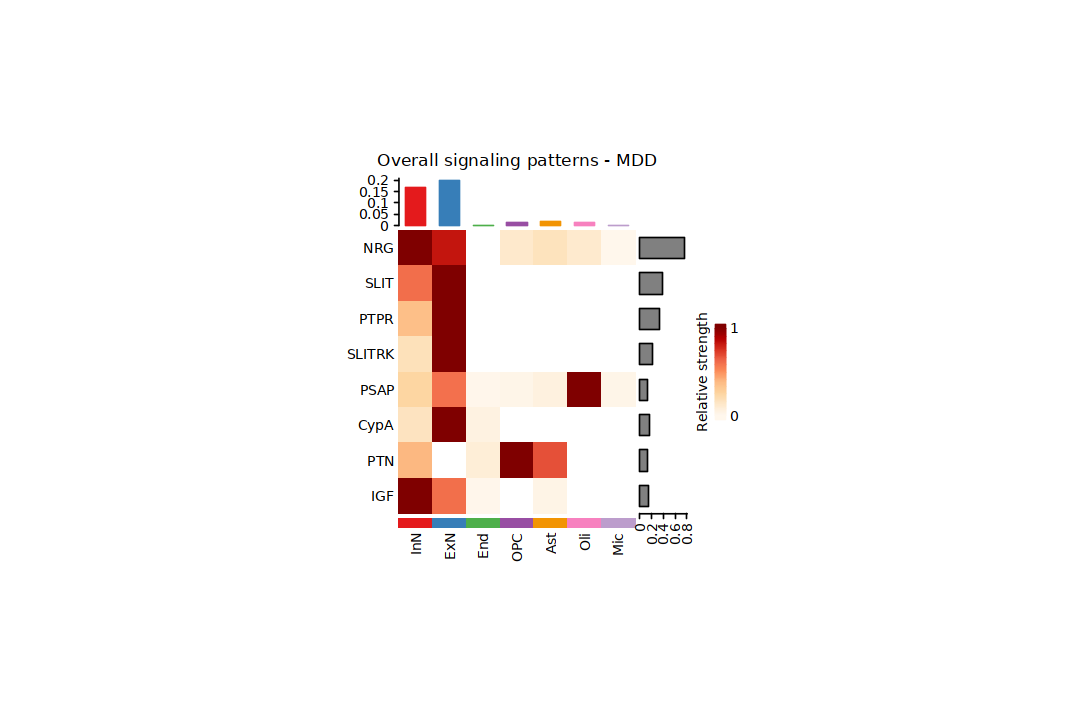

In [39]:
ht2 = netAnalysis_signalingRole_heatmap(object.list[[2]], pattern = "all", signaling = pathway.union, title = names(object.list)[2], width = 5, height = 6, color.heatmap = "OrRd")
ht2

In [54]:
pdf('./figure2/cellchat/sc.mye.cellchat7.pdf',height = 5,width = 5)
print(ht1 )
dev.off()
pdf('./figure2/cellchat/sc.mye.cellchat8.pdf',height = 5,width = 5)
print(ht2 )
dev.off()

png 
  2

png 
  2

In [ ]:
par(mfrow = c(1,2), xpd=TRUE)
ht1 = netAnalysis_signalingRole_heatmap(object.list[[1]], pattern = "outgoing", signaling = pathway.union, title = names(object.list)[1], width = 5, height = 6)
ht2 = netAnalysis_signalingRole_heatmap(object.list[[2]], pattern = "outgoing", signaling = pathway.union, title = names(object.list)[2], width = 5, height = 6)

pdf('./figure2/cellchat/sc.outgoing.cellchat9.pdf',height = 5,width = 5)
print(ht1 )
dev.off()
pdf('./figure2/cellchat/sc.outgoing.cellchat10.pdf',height = 5,width = 5)
print(ht2 )
dev.off()

In [65]:
par(mfrow = c(1,2), xpd=TRUE)
ht1 = netAnalysis_signalingRole_heatmap(object.list[[1]], pattern = "incoming", signaling = pathway.union, title = names(object.list)[1], width = 5, height = 6)
ht2 = netAnalysis_signalingRole_heatmap(object.list[[2]], pattern = "incoming", signaling = pathway.union, title = names(object.list)[2], width = 5, height = 6)

pdf('./figure2/cellchat/sc.outgoing.cellchat9.pdf',height = 5,width = 5)
print(ht1 )
dev.off()
pdf('./figure2/cellchat/sc.outgoing.cellchat10.pdf',height = 5,width = 5)
print(ht2 )
dev.off()

png 
  2

png 
  2

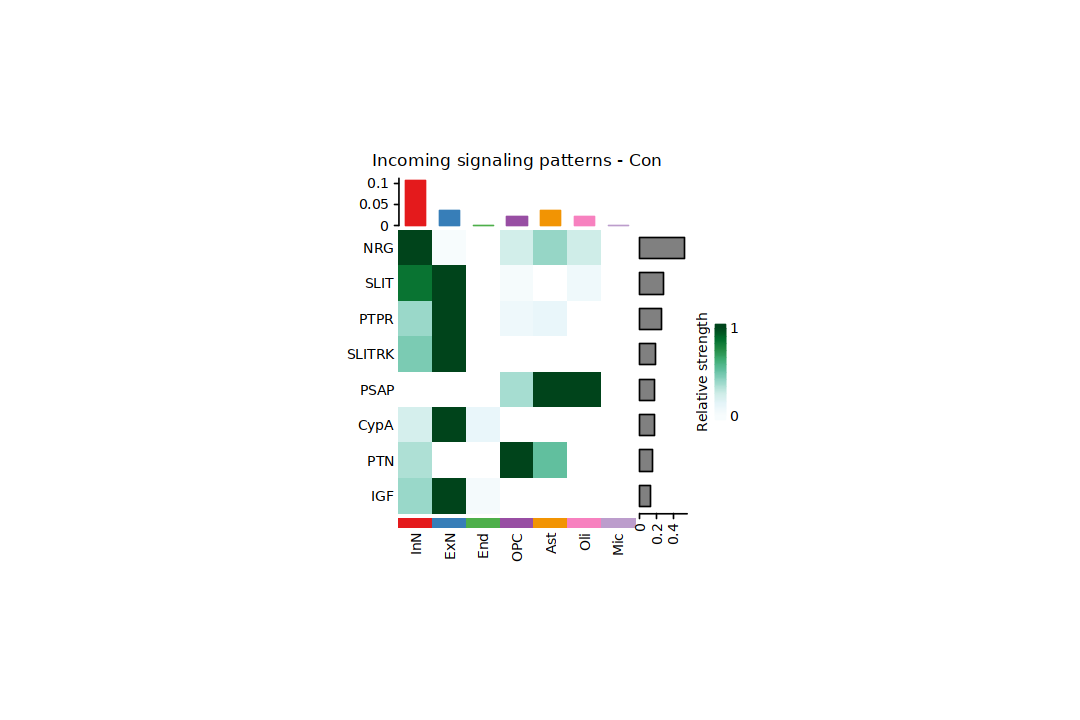

In [66]:
ht1

In [67]:
options(repr.plot.width = 13,repr.plot.height = 5)

In [85]:
p = netVisual_bubble(cellchat,  font.size = 16, comparison = c(1, 2),max.dataset = 1, #sources.use =  c(1,3:7),targets.use = 2,
                     title.name = "Deseased signaling in MDD",
                  remove.isolate = TRUE, angle.x = 45)

Comparing communications on a merged object 




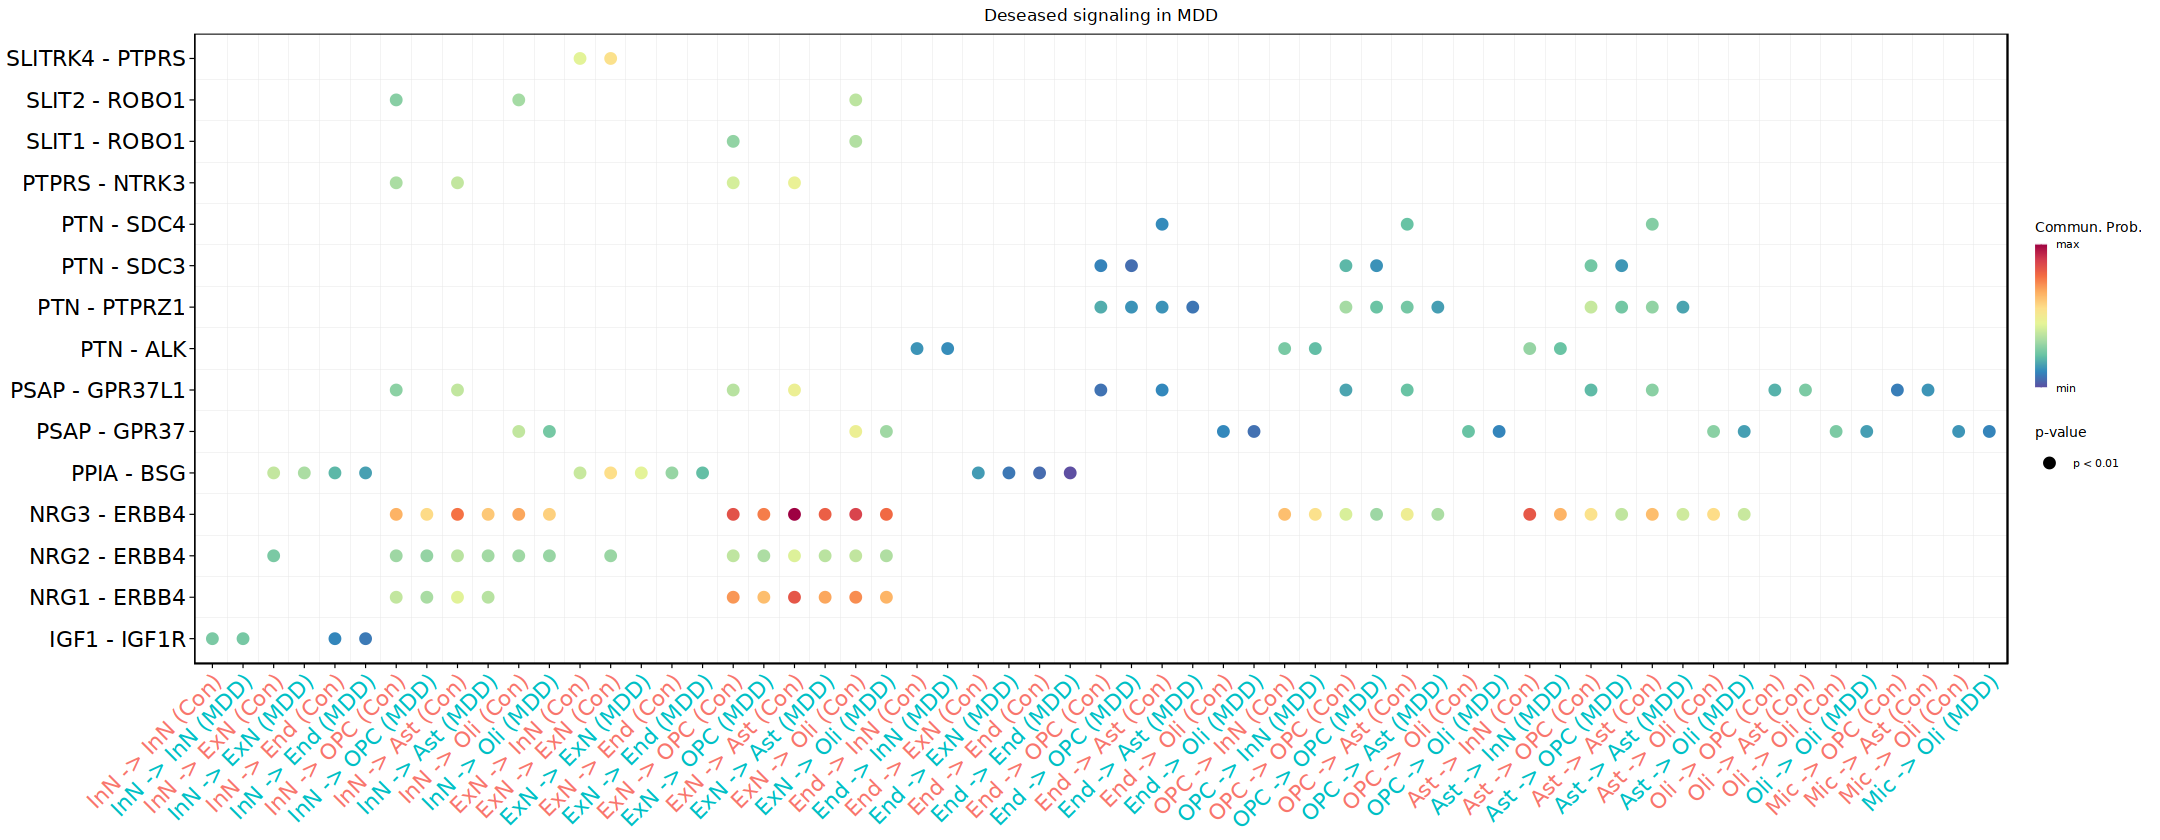

In [86]:
p

In [88]:
pdf('./figure2/cellchat/cellcaht11.pdf',width = 16,height = 6)
p
dev.off()

png 
  2

In [94]:
options(repr.plot.width = 8,repr.plot.height =5 )

In [95]:
p = netVisual_bubble(cellchat, font.size = 16, thresh = 0.01, comparison = c(1,2),  angle.x = 45,#sources.use = c(2,3), targets.use = c(1,3:7),
                     max.dataset = 2,  remove.isolate = TRUE,title.name = "Increased signaling in MDD")  #
#> Comparing communications on a merged object

Comparing communications on a merged object 




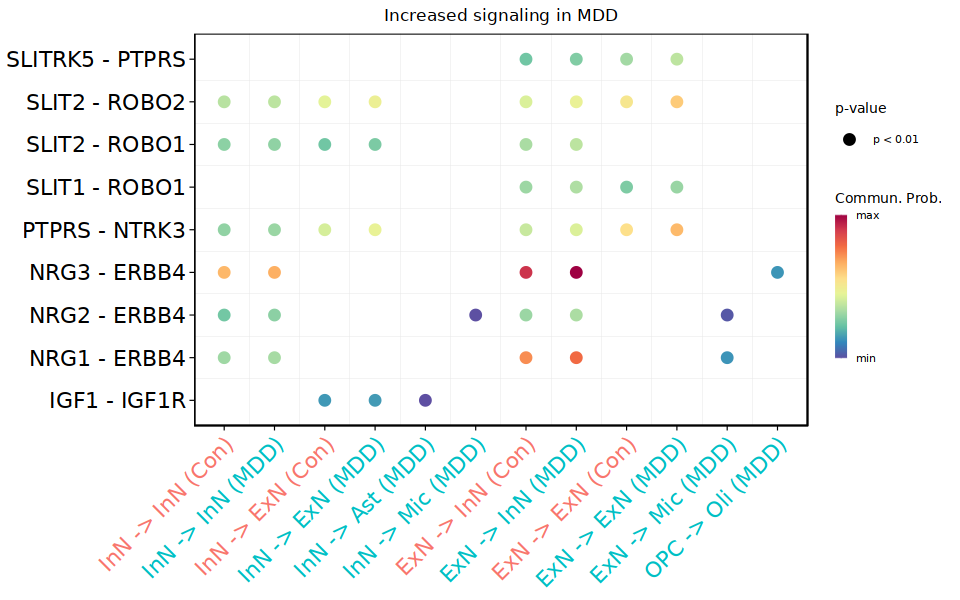

In [96]:
p

In [97]:
pdf('./figure2/cellchat/cellcaht12.pdf',width = 8,height = 5)
p
dev.off()

png 
  2

In [98]:
# define a positive dataset, i.e., the dataset with positive fold change against the other dataset
pos.dataset = "MDD"
# define a char name used for storing the results of differential expression analysis
features.name = pos.dataset
# perform differential expression analysis
cellchat <- identifyOverExpressedGenes(cellchat, group.dataset = "datasets", pos.dataset = pos.dataset, features.name = features.name, only.pos = FALSE, thresh.pc = 0.1, thresh.fc = 0.1, thresh.p = 1)
#> Use the joint cell labels from the merged CellChat object
# map the results of differential expression analysis onto the inferred cell-cell communications to easily manage/subset the ligand-receptor pairs of interest
net <- netMappingDEG(cellchat, features.name = features.name)
# extract the ligand-receptor pairs with upregulated ligands in LS
net.up <- subsetCommunication(cellchat, net = net, datasets = "MDD",ligand.logFC = 0.2, receptor.logFC = NULL)
# extract the ligand-receptor pairs with upregulated ligands and upregulated recetptors in NL, i.e.,downregulated in LS
net.down <- subsetCommunication(cellchat, net = net, datasets = "Con",ligand.logFC = -0.1, receptor.logFC = -0.1)

Use the joint cell labels from the merged CellChat object



In [99]:
gene.up <- extractGeneSubsetFromPair(net.up, cellchat)
gene.down <- extractGeneSubsetFromPair(net.down, cellchat)

Comparing communications on a merged object 


Comparing communications on a merged object 




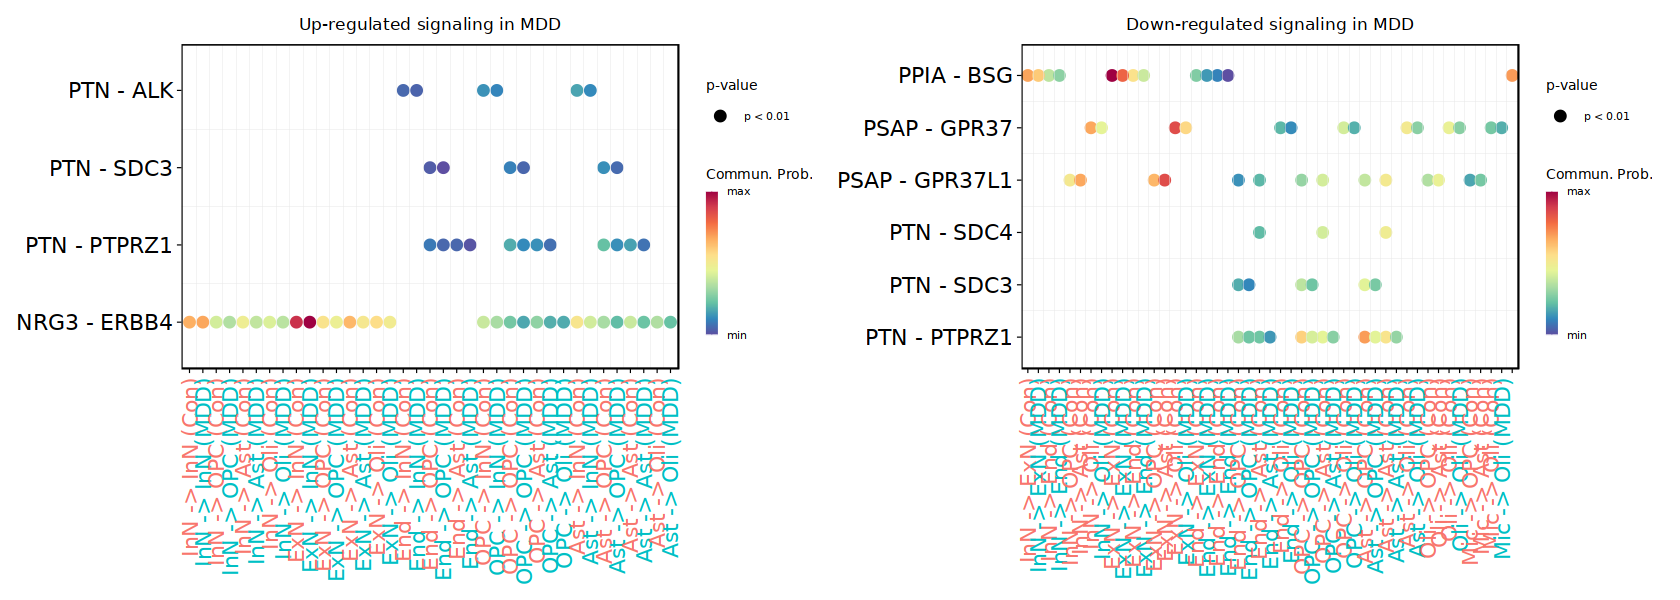

In [107]:
pairLR.use.up = net.up[, "interaction_name", drop = F]
gg1 <- netVisual_bubble(cellchat, pairLR.use = pairLR.use.up, comparison = c(1, 2),  angle.x = 90, font.size = 16,remove.isolate = T,title.name = paste0("Up-regulated signaling in ", names(object.list)[2]))
#> Comparing communications on a merged object
pairLR.use.down = net.down[, "interaction_name", drop = F]
gg2 <- netVisual_bubble(cellchat, pairLR.use = pairLR.use.down, comparison = c(1, 2),  angle.x = 90, font.size = 16,remove.isolate = T,title.name = paste0("Down-regulated signaling in ", names(object.list)[2]))
#> Comparing communications on a merged object
gg1 + gg2

In [111]:
options(repr.plot.width = 14,repr.plot.height =10 )

In [113]:
pdf('./figure2/cellchat/cellcaht13.pdf',width = 14,height = 10)
gg2/gg1
dev.off()

png 
  2

In [115]:
options(repr.plot.width = 8,repr.plot.height =5)

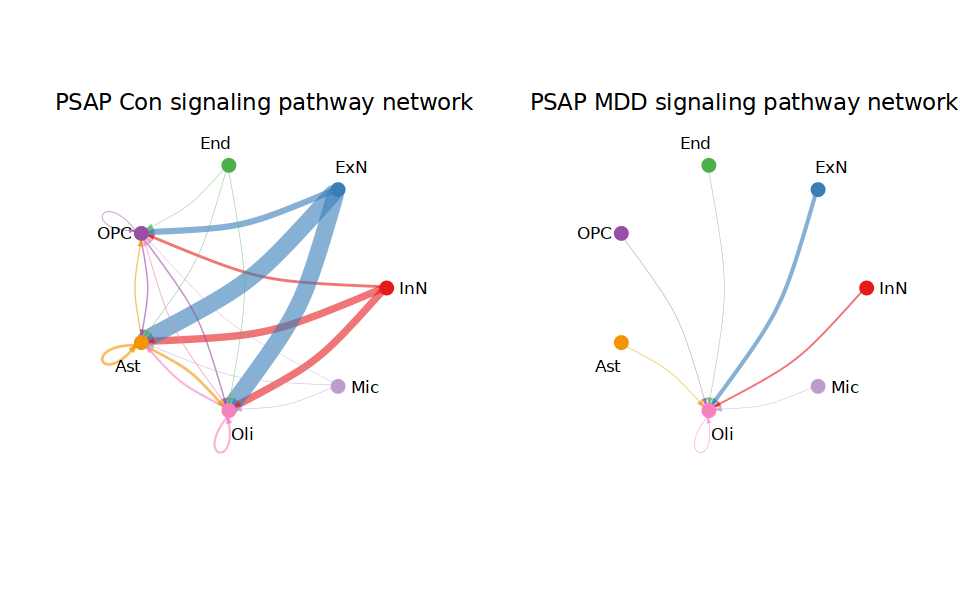

In [118]:
par(mfrow = c(1,2), xpd=TRUE)
for (i in 1:length(object.list)) {
  netVisual_aggregate(object.list[[i]], signaling = pathways.show, layout = "circle", edge.weight.max = weight.max[1], edge.width.max = 10, signaling.name = paste(pathways.show, names(object.list)[i]))
}

In [117]:
pdf('./figure2/cellchat/cellcaht14.pdf',width = 8,height = 5)
pathways.show <- c("PSAP") 
weight.max <- getMaxWeight(object.list, slot.name = c("netP"), attribute = pathways.show) # control the edge weights across different datasets
par(mfrow = c(1,2), xpd=TRUE)
for (i in 1:length(object.list)) {
  netVisual_aggregate(object.list[[i]], signaling = pathways.show, layout = "circle", edge.weight.max = weight.max[1], edge.width.max = 10, signaling.name = paste(pathways.show, names(object.list)[i]))
}
dev.off()

png 
  2